# This jupyter notebook provides various analysis about relax results

In [122]:
%aiida
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## imports and settings

In [123]:
import os
import yaml
import numpy as np
from pprint import pprint
from matplotlib import pyplot as plt
from aiidaplus.plot import line_chart_group

relax_dir = os.path.join('..', 'data', 'relax')

## extract yaml files

In [124]:
yamlfiles = [ name for name in os.listdir(relax_dir) if 'yaml' in name ]
yamlfiles.sort()
relaxes = []
for yamlfile in yamlfiles:
    with open(os.path.join(relax_dir, yamlfile)) as f:
        relaxes.append(yaml.load(f, Loader=yaml.SafeLoader))

## data details

In [125]:
print("# keys of each relax data")
print(relaxes[0].keys())
print("")
for key in relaxes[0]:
    if key != 'steps':
        print("## {}:".format(key))
        print(relaxes[0][key])
        print('')
        
print("## steps")
print(relaxes[0]['steps'].keys())
print("")
print("### step_00")
print(relaxes[0]['steps']['step_00'].keys())

# keys of each relax data
dict_keys(['data_type', 'final_energy_no_entropy', 'final_structure_pk', 'initial_structure_pk', 'pk', 'steps'])

## data_type:
RelaxWorkChain

## final_energy_no_entropy:
-16.62098577

## final_structure_pk:
6954

## initial_structure_pk:
5139

## pk:
6170

## steps
dict_keys(['step_00', 'step_01'])

### step_00
dict_keys(['data_type', 'energy_no_entropy', 'incar', 'kpoints', 'maximum_force', 'maximum_stress', 'pk', 'potential_family', 'potential_mapping', 'structure'])


In [214]:
kdensities = [ relax['steps']['step_00']['kpoints']['density'] for relax in relaxes ]
kpoints_nums = []
for relax in relaxes:
    m = relax['steps']['step_00']['kpoints']['mesh']
    kpoints_nums.append(m[0]*m[1]*m[2])
sigmas = [ relax['steps']['step_00']['incar']['sigma'] for relax in relaxes ]
energies = [ relax['final_energy_no_entropy'] for relax in relaxes ]
structures = [ load_node(relax['final_structure_pk']).get_pymatgen() for relax in relaxes ]
a_norms = [ structure.lattice.a for structure in structures ]
c_norms = [ structure.lattice.c for structure in structures ]

datas = {
    'kdensities': kdensities,
    'kpoints_nums': kpoints_nums,
    'sigmas': sigmas,
    'energies': energies,
    'a_norms': a_norms,
    'c_norms': c_norms,
}

# left side of x data has high kdensity


Text(0.5, 0.98, 'kdensity v.s. energy')

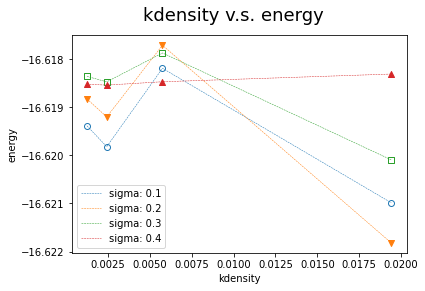

In [217]:
print("# left side of x data has high kdensity")
xdata = datas['kdensities']
ydata = datas['energies']
xlabel = 'kdensity'
ylabel = 'energy'
gdata = datas['sigmas']
glabel = 'sigma'
title = "{} v.s. {}".format(xlabel, ylabel)


fig = plt.figure()
ax = fig.add_subplot(111)
line_chart_group(ax=ax,
                 xdata=xdata,
                 ydata=ydata,
                 xlabel=xlabel,
                 ylabel=ylabel,
                 gdata=gdata,
                 glabel=glabel)
fig.suptitle(title, fontsize=18)

Text(0.5, 0.98, 'kpoints num v.s. energy')

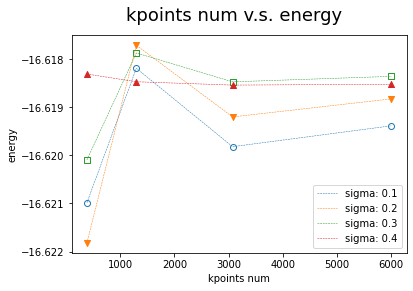

In [219]:
xdata = datas['kpoints_nums']
ydata = datas['energies']
xlabel = 'kpoints num'
ylabel = 'energy'
gdata = datas['sigmas']
glabel = 'sigma'
title = "{} v.s. {}".format(xlabel, ylabel)


fig = plt.figure()
ax = fig.add_subplot(111)
line_chart_group(ax=ax,
                 xdata=xdata,
                 ydata=ydata,
                 xlabel=xlabel,
                 ylabel=ylabel,
                 gdata=gdata,
                 glabel=glabel)
fig.suptitle(title, fontsize=18)

Text(0.5, 0.98, 'kpoints num v.s. a norm')

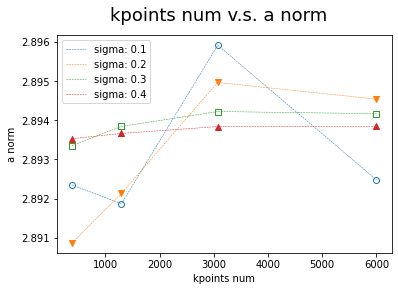

In [221]:
xdata = datas['kpoints_nums']
ydata = datas['a_norms']
xlabel = 'kpoints num'
ylabel = 'a norm'
gdata = datas['sigmas']
glabel = 'sigma'
title = "{} v.s. {}".format(xlabel, ylabel)


fig = plt.figure()
ax = fig.add_subplot(111)
line_chart_group(ax=ax,
                 xdata=xdata,
                 ydata=ydata,
                 xlabel=xlabel,
                 ylabel=ylabel,
                 gdata=gdata,
                 glabel=glabel)
fig.suptitle(title, fontsize=18)

Text(0.5, 0.98, 'kpoints num v.s. c norm')

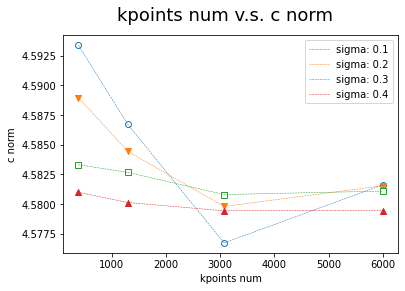

In [222]:
xdata = datas['kpoints_nums']
ydata = datas['c_norms']
xlabel = 'kpoints num'
ylabel = 'c norm'
gdata = datas['sigmas']
glabel = 'sigma'
title = "{} v.s. {}".format(xlabel, ylabel)


fig = plt.figure()
ax = fig.add_subplot(111)
line_chart_group(ax=ax,
                 xdata=xdata,
                 ydata=ydata,
                 xlabel=xlabel,
                 ylabel=ylabel,
                 gdata=gdata,
                 glabel=glabel)
fig.suptitle(title, fontsize=18)